# Common Words of Sports Betting Across

## Goal:

* Scrape Github for repos with sports betting as a subject matter sorted by number of stars.
* Find the key words that predict what programming language is used.
* Use 2 NLP techniques to construct 3 machine learning classification models to predict what programming language is used in the scraped repos.
* Visualize the results.

## Imports

In [1]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
#import regular expression operations
import re
#import natural language toolkit
import nltk
#import stopwords list
from nltk.corpus import stopwords
# import wordcloud
from wordcloud import WordCloud

import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import os
from pprint import pprint 
import time
import json

import wrangle as w
import auto_model2a1 as atm


# <div class="alert alert-block alert-info">  Wrangle 
### Acquiring CSV
* Scraped Github for repos related to sports betting returning a dataframe with the name of the repo, language used, and the readme contents
* The retrieved data was then stored json file
* Each row represents a repo
* Each column represents a feature related to the program language used or the text found in the repo's README

### Prepare:
* Loaded json file as a dataframe
* Cleaned the dataframe
	* removed everything except special characters and lowercased the text
	* encoded, decoded, tokenized, lemmatized, and removed stopwords form the text
* Dropped all nulls


### Data Dictionary: 
* Explanation of dataset features

| Feature | Definition (measurement)|
|:--------|:-----------|
|Repo| The name of the repository|
|Language| The primary programming language used|
|Readme_contents| The contents of the readme (english language text)|

In [2]:
#import, convert, and clean data
df = pd.read_json('data.json')
df = pd.DataFrame(df)
df=w.cleaned(df)

### Split

In [3]:
#calls function to split the dataframe into train, validate, and test
train, validate, test = w.split_function_cat_target(df, "language")

<div class="alert alert-block alert-info"> 
    
## Explore
    
### Questions To Answer:
1. What are the most common words in Python/JavaScript sports betting repos?
2. What are the five most common words? 
3. Does number of unique words vary between Python and JavaScript when it comes to sports betting repos?
4. Are there any words that uniquely identify a language used in sports betting repos?

In [4]:
#calls the function to explore the word count and word frequency
python_freq, java_script_freq, jupyter_notebook_freq, html_freq, r_freq, other_freq, all_freq, python_words,\
          java_script_words, jupyter_notebook_words, html_words, r_words, other_words, all_words = w.explore(df,train)

#calls the function to create a df for word count
word_counts=w.word_counts_df(python_freq, java_script_freq, jupyter_notebook_freq,
                        html_freq, r_freq, all_freq)

## 1. What are the most common words in Python/JavaScript sports betting repos?

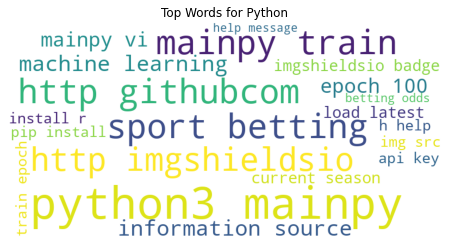

,python
odds,53
http,51
betting,31
bet,29
sport,28


In [5]:
#calls the function to plot the word frequency via word cloud

w.plot_bigrams("Python",w.make_ngrams(python_words,2))
word_counts[['python']].sort_values(by='python', ascending=False).head()

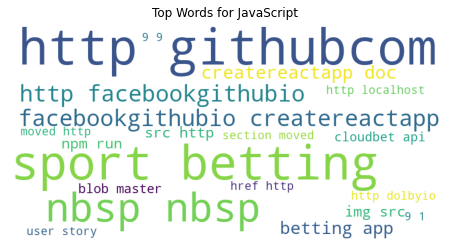

,java_script
http,130
app,64
betting,45
user,45
sport,43


In [6]:
w.plot_bigrams("JavaScript",w.make_ngrams(java_script_words,2))
word_counts[['java_script']].sort_values(by='java_script', ascending=False).head()

## 2. What are the five most common words? 

In [7]:
#brings back the top 5 for each language sorted by total
word_counts.sort_values(by='all', ascending=False).head()

,python,java_script,jupyter_notebook,html,r,all
http,51,130,30,37,33,674
bet,29,36,13,6,11,319
odds,53,11,11,1,43,238
sport,28,43,19,2,8,233
betting,31,45,13,4,7,215


## 3. Does number of unique words vary between Python and JavaScript when it comes to sports betting repos?

In [8]:
#returns the unique words for each language
unique_python_words = list(set(python_words))
unique_java_script_words = list(set(java_script_words))
print(f"The total number of unique words used in python: {len(unique_python_words)}")
print(f"The total number of unique words used in javascript: {len(unique_java_script_words)}")   

The total number of unique words used in python: 1219
The total number of unique words used in javascript: 1060


### Yes, there is a 159 word difference.

## 4. Are there any words that uniquely identify a language used in sports betting repos?

### Yes. the following words, organized by language type, are the unique words for each.

In [9]:
#compare the words in python_words and java_script_words and return unique words from each 
w.top_unique_words(unique_python_words, unique_java_script_words)

  Python Words
0          987
1          095
2      3scrape
3    describes
4      moibile
5      gonzaga
6      warning
7       school
8     connects
9       latest 
 -------------------------------------------- 
                      Java_script Words
0                                  rank
1                             normalize
2                             statussvg
3                             license20
4                                 smart
5                            suggestion
6                             obligated
7                            livestream
8                            compressor
9  viewdocumentationbluestyleflatsquare


<div class="alert alert-block alert-info">  

## Explore Takeaways: FIX
1. Does the number of days since an app's release date affect viral?
    * Surprisingly, no. This is likely due to the fact that most apps, due to quality and other variables beyond the scope of this initial project, will never make it pass 0 downloads 
    no matter how long they stay on the app store.
2. Does editors choice and/or rating affect viral? 
    * Yes editors choice has a significant effect on going viral but user rating has very little positive impact on going viral. This indicates that users of the app store put more stock in the “editor” versus other users. 
3. Does content rating affect viral?
    * Yes, going for the largest audience possible by having a low content rating has a very significant impact on the app’s likelihood of going viral. 
4. What are the best features to use?

<div class="alert alert-block alert-info"> 
    
# Modeling Overview
        
## Features to Used 
* The first iteration uses a bag of words via the term frequency    
* The second iteration of modeling uses a bag of words the TF-IDF
* The third iteration of modeling uses a bag of ngrams via the term frequency
   
---
# Models Used and Metrics       

## **Classification Models Used:**
    
* K-Nearest Neighbors
* Random Forest
* Logistic Regression
 
#### Baseline: 27%    
#### Accuracy is the evaluation metric

In [10]:
#call the function to create the X and y variables for train, validate, and test
X_train, y_train, X_validate, y_validate, X_test, y_test = w.X_y_variables(train, validate, test)

#calls the function to create the count vectorizer for bag of words TF
X_bow, X_validate_bow, X_test_bow = w.X_y_variables_bow(X_train, X_validate, X_test)

## KNN: Bag of Words TF

In [11]:
#auto runs through knn models with k values 5-20
atm.auto_knn_scores(X_bow, y_train, X_validate_bow, y_validate)

     k  train_accuracy  validate_accuracy     delta
0    5        0.600000               0.15  0.450000
15  20        0.416667               0.15  0.266667
2    7        0.433333               0.20  0.233333
1    6        0.416667               0.20  0.216667
3    8        0.466667               0.25  0.216667
13  18        0.416667               0.25  0.166667
4    9        0.383333               0.25  0.133333
14  19        0.416667               0.30  0.116667
5   10        0.316667               0.20  0.116667
11  16        0.400000               0.30  0.100000
7   12        0.300000               0.20  0.100000
12  17        0.333333               0.25  0.083333
6   11        0.316667               0.25  0.066667
8   13        0.266667               0.20  0.066667
9   14        0.350000               0.30  0.050000
10  15        0.383333               0.40 -0.016667


## Random Forest: Bag of Words TF

In [12]:
#auto runs through random forest with max_depth values 5-20
atm.auto_random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
5          10        1.000000               0.30  0.700000
8          13        1.000000               0.30  0.700000
10         15        1.000000               0.30  0.700000
12         17        1.000000               0.30  0.700000
13         18        1.000000               0.30  0.700000
14         19        1.000000               0.30  0.700000
2           7        0.966667               0.30  0.666667
4           9        1.000000               0.35  0.650000
6          11        1.000000               0.35  0.650000
7          12        1.000000               0.35  0.650000
9          14        1.000000               0.35  0.650000
11         16        1.000000               0.35  0.650000
0           5        0.916667               0.30  0.616667
3           8        1.000000               0.40  0.600000
15         20        1.000000               0.40  0.600000
1           6        0.933333               0.35  0.5833

## Logistic Regression: Bag of Words TF

In [13]:
#auto runs through logistic regression models with C values .1-1
atm.auto_lo_regress_scores(X_bow, y_train, X_validate_bow, y_validate)

   c_range  train_accuracy  validate_accuracy  delta
0      0.1             1.0               0.30   0.70
6      0.7             1.0               0.30   0.70
7      0.8             1.0               0.30   0.70
8      0.9             1.0               0.30   0.70
3      0.4             1.0               0.35   0.65
4      0.5             1.0               0.35   0.65
5      0.6             1.0               0.35   0.65
1      0.2             1.0               0.40   0.60
2      0.3             1.0               0.40   0.60


### Take away for Bag of Words TF Modeling:
KNN with K set to 15 is the best performing model at 40% accuracy beating baseline (27%) while not over fitting.

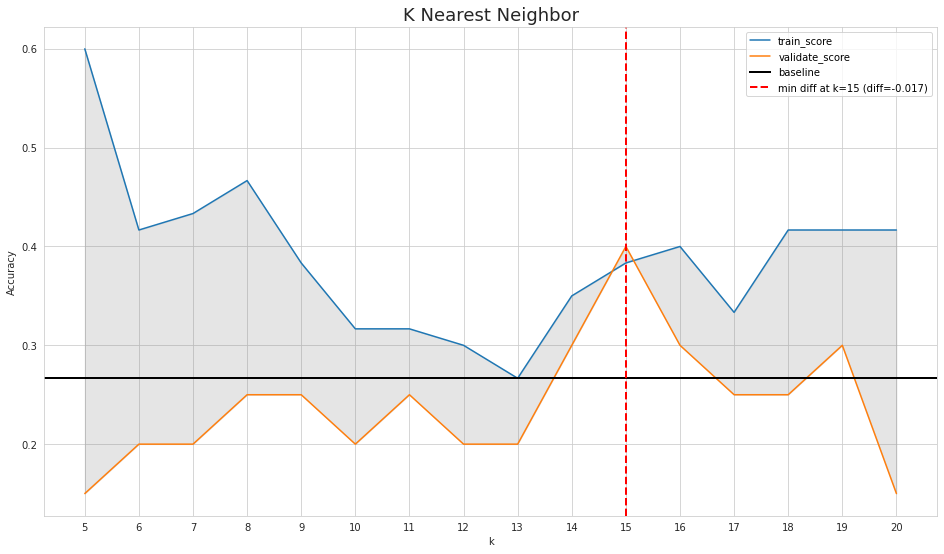

In [14]:
#calls the function to plot the delta for knn models
atm.knn_plot_delta(X_bow, y_train, X_validate_bow, y_validate)

## KNN: Bag of Words TF-IDF

In [15]:
#calls the function to create the TF-IDF vectorizer for bag of words TF-IDF
X_bow, X_validate_bow, X_test_bow = w.X_y_variables_tfidf(X_train, X_validate, X_test)

#auto runs through knn models with k values 5-20
atm.auto_knn_scores(X_bow, y_train, X_validate_bow, y_validate)

     k  train_accuracy  validate_accuracy     delta
2    7        0.566667               0.40  0.166667
3    8        0.600000               0.45  0.150000
0    5        0.566667               0.45  0.116667
7   12        0.483333               0.40  0.083333
9   14        0.483333               0.40  0.083333
4    9        0.516667               0.45  0.066667
8   13        0.466667               0.40  0.066667
1    6        0.500000               0.45  0.050000
5   10        0.500000               0.45  0.050000
6   11        0.500000               0.45  0.050000
10  15        0.533333               0.50  0.033333
13  18        0.483333               0.50 -0.016667
11  16        0.466667               0.50 -0.033333
12  17        0.466667               0.50 -0.033333
15  20        0.466667               0.50 -0.033333
14  19        0.500000               0.55 -0.050000


## Random Forest: Bag of Words TF-IDF

In [16]:
#auto runs through random forest models with max_depth values 5-20
atm.auto_random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
2           7        0.983333               0.30  0.683333
6          11        1.000000               0.35  0.650000
1           6        0.983333               0.35  0.633333
3           8        1.000000               0.40  0.600000
4           9        1.000000               0.40  0.600000
5          10        1.000000               0.40  0.600000
8          13        1.000000               0.40  0.600000
0           5        0.933333               0.35  0.583333
7          12        1.000000               0.45  0.550000
9          14        1.000000               0.45  0.550000
10         15        1.000000               0.45  0.550000
15         20        1.000000               0.45  0.550000
11         16        1.000000               0.50  0.500000
12         17        1.000000               0.50  0.500000
13         18        1.000000               0.50  0.500000
14         19        1.000000               0.55  0.4500

## Logistic Regression: Bag of Words TF-IDF

In [17]:
#auto runs through logistic regression models with C values .1-1
atm.auto_lo_regress_scores(X_bow, y_train, X_validate_bow, y_validate)

   c_range  train_accuracy  validate_accuracy     delta
8      0.9        0.750000               0.35  0.400000
1      0.2        0.700000               0.30  0.400000
2      0.3        0.733333               0.35  0.383333
5      0.6        0.733333               0.35  0.383333
6      0.7        0.733333               0.35  0.383333
7      0.8        0.733333               0.35  0.383333
3      0.4        0.733333               0.40  0.333333
4      0.5        0.733333               0.40  0.333333
0      0.1        0.400000               0.30  0.100000


### Take away for Bag of Words TF-IDF Modeling:
KNN with K set to 11 is the best performing model at 45% accuracy beating baseline (27%) while not over fitting.

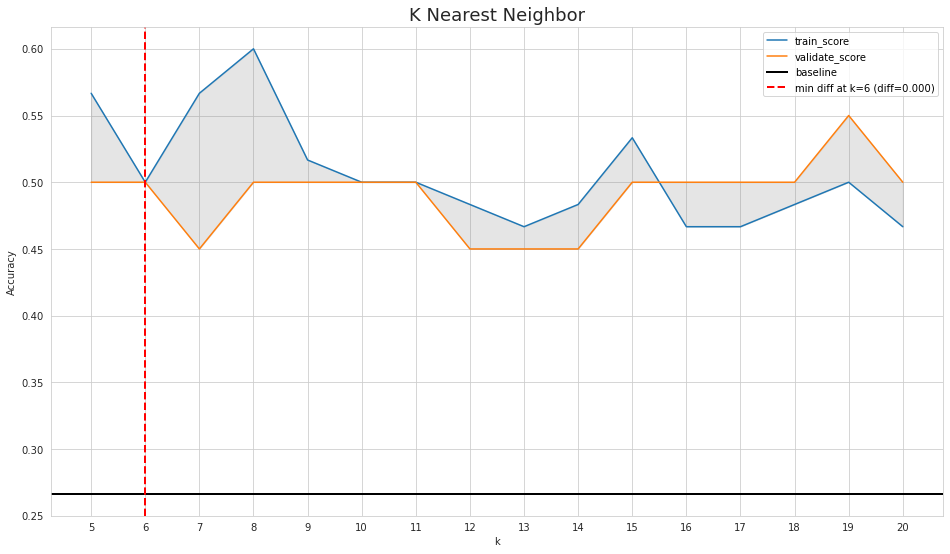

In [18]:
#calls the function to plot the delta for knn models
atm.knn_plot_delta(X_bow, y_train, X_validate_bow, y_validate)

## KNN: Bag of Ngrams TF-IDF

In [19]:
#calls the function to set the X and y variables for bag of ngrams TF-IDF
X_bow, X_validate_bow, X_test_bow = w.X_y_variables_ngrams_tfidf(X_train, X_validate, X_test)

#auto runs through knn models with k values 5-20
atm.auto_knn_scores(X_bow, y_train, X_validate_bow, y_validate)

     k  train_accuracy  validate_accuracy     delta
2    7        0.600000               0.40  0.200000
1    6        0.583333               0.40  0.183333
8   13        0.483333               0.35  0.133333
3    8        0.533333               0.40  0.133333
4    9        0.516667               0.40  0.116667
11  16        0.466667               0.35  0.116667
9   14        0.483333               0.40  0.083333
0    5        0.516667               0.45  0.066667
6   11        0.516667               0.45  0.066667
12  17        0.416667               0.35  0.066667
5   10        0.500000               0.45  0.050000
7   12        0.500000               0.45  0.050000
10  15        0.500000               0.45  0.050000
13  18        0.450000               0.40  0.050000
15  20        0.466667               0.50 -0.033333
14  19        0.450000               0.50 -0.050000


## Random Forest Bag: of Ngrams TF-IDF

In [20]:
#auto runs through random forest models with max_depth values 5-20
atm.auto_random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
2           7        0.950000               0.35  0.600000
5          10        1.000000               0.40  0.600000
6          11        1.000000               0.40  0.600000
15         20        1.000000               0.40  0.600000
12         17        1.000000               0.45  0.550000
3           8        0.933333               0.40  0.533333
4           9        0.983333               0.45  0.533333
0           5        0.850000               0.35  0.500000
8          13        1.000000               0.50  0.500000
9          14        1.000000               0.50  0.500000
10         15        1.000000               0.50  0.500000
11         16        1.000000               0.50  0.500000
13         18        1.000000               0.50  0.500000
14         19        1.000000               0.50  0.500000
1           6        0.883333               0.40  0.483333
7          12        1.000000               0.55  0.4500

## Logistic Regression: Bag of Ngrams TF-IDF

In [21]:
#auto runs through logistic regression models with C values .1-1
atm.auto_lo_regress_scores(X_bow, y_train, X_validate_bow, y_validate)

   c_range  train_accuracy  validate_accuracy     delta
1      0.2        0.733333               0.30  0.433333
2      0.3        0.733333               0.30  0.433333
3      0.4        0.733333               0.30  0.433333
4      0.5        0.733333               0.35  0.383333
5      0.6        0.733333               0.35  0.383333
6      0.7        0.733333               0.45  0.283333
7      0.8        0.733333               0.45  0.283333
8      0.9        0.733333               0.45  0.283333
0      0.1        0.316667               0.30  0.016667


### Take away for Bag of Ngrams TF-IDF Modeling:
* KNN with K set to 19 is the best performing model at 50% accuracy beating baseline (27%) while not over fitting. 

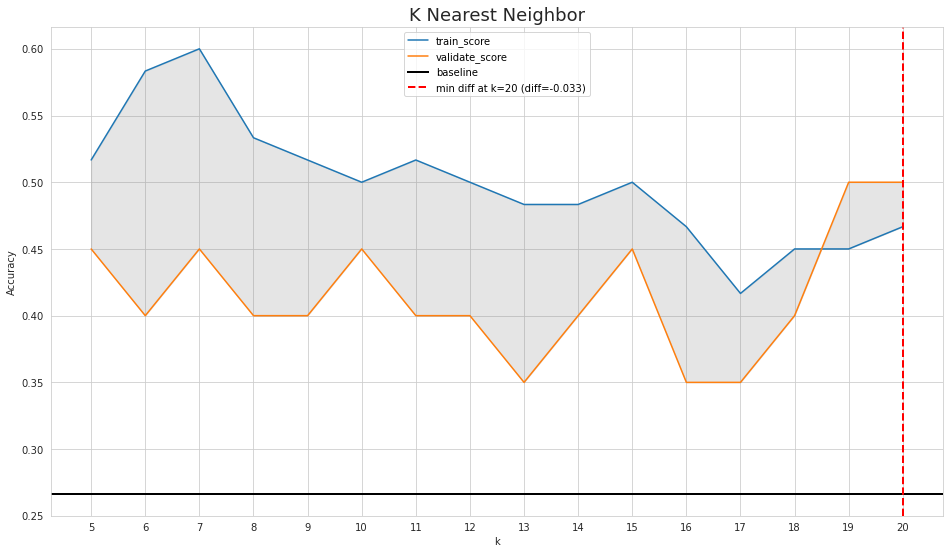

In [22]:
#calls the function to plot the delta for knn models
atm.knn_plot_delta(X_bow, y_train, X_validate_bow, y_validate)

## Testing on KNN Bag of Words TF-IDF at a K of 19


------------------------ Test Model with k of 11------------------------------
           HTML  JavaScript  Jupyter Notebook    Python    R  other  accuracy  \
precision   0.0     0.31250               0.0  0.500000  0.0    0.0      0.35   
recall      0.0     1.00000               0.0  0.400000  0.0    0.0      0.35   
f1-score    0.0     0.47619               0.0  0.444444  0.0    0.0      0.35   
support     1.0     5.00000               2.0  5.000000  2.0    5.0      0.35   

           macro avg  weighted avg  
precision   0.135417      0.203125  
recall      0.233333      0.350000  
f1-score    0.153439      0.230159  
support    20.000000     20.000000  
------------ Metrics ----------
Accuracy is 0.35


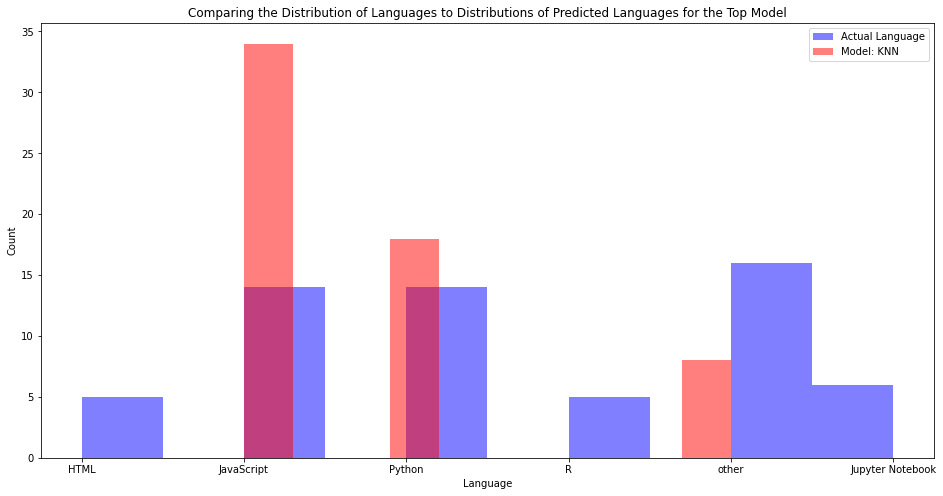

In [26]:
#calls the function to create the TF-IDF vectorizer for bag of words TF-IDF
X_bow, X_validate_bow, X_test_bow = w.X_y_variables_tfidf(X_train, X_validate, X_test)

#calls the function to test on the best KNN model 
atm.auto_KNN_test(X_test_bow, y_test, X_bow, y_train, k=11)

<div class="alert alert-block alert-info">

## Model Performance and Conclusions
### Throughout 1st, 2nd, and 3rd iterations KNN outperformed all other models while maintaining a relatively low train to validate delta score. 
### The best KNN model was the TF-IDF model with a k of 11, beating the baseline of 27% with a 35% accuracy. 


<div class="alert alert-block alert-info">
    
# Project Conclusion
    

### Explore:
   
* The most common words across all programming languages used in repos related to sport betting are, http, app, betting, user, sport (in that order).. 
  
* There is a difference in the number of unique words used in Python repos v. JavaScript repos with Python repos having 159 more unique words.. 
  
* There are words that uniquely identify program languages, however, they seem to have little to do with unique features of the language (i.e. machine learning, object oriented, etc) and more to do with how the language is used within sport betting.
  
 
    
### Modeling:

Throughout 1st, 2nd, and 3rd iterations KNN outperformed all other models while maintaining a relatively low train to validate delta score. The best KNN model was the TF-IDF model with a k of 11, beating the baseline of 27% with a 35% accuracy. 
    

    
### Recommendations and Next Steps:
 
add 